1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [2]:
import numpy as np
from scipy.interpolate import UnivariateSpline

# Load the dataset
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

# Compute cumulative probability (cprob) for each year
cprob = np.arange(1, years_nb + 1) / (years_nb + 1)

# Sort the maximum speeds
sorted_speeds = np.sort(max_speeds)

# Use UnivariateSpline to define a quantile function
quantile_func = UnivariateSpline(cprob, sorted_speeds, s=0)

# Define the cumulative probability for the storm wind speed occurring every 50 years
fifty_prob = 1. - 0.02

# Estimate the storm wind speed occurring every 50 years using the quantile function
fifty_wind = quantile_func(fifty_prob)

# Print the result
print(f"The storm wind speed occurring every 50 years is estimated to be: {fifty_wind:.2f} m/s")

The storm wind speed occurring every 50 years is estimated to be: 36.97 m/s


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

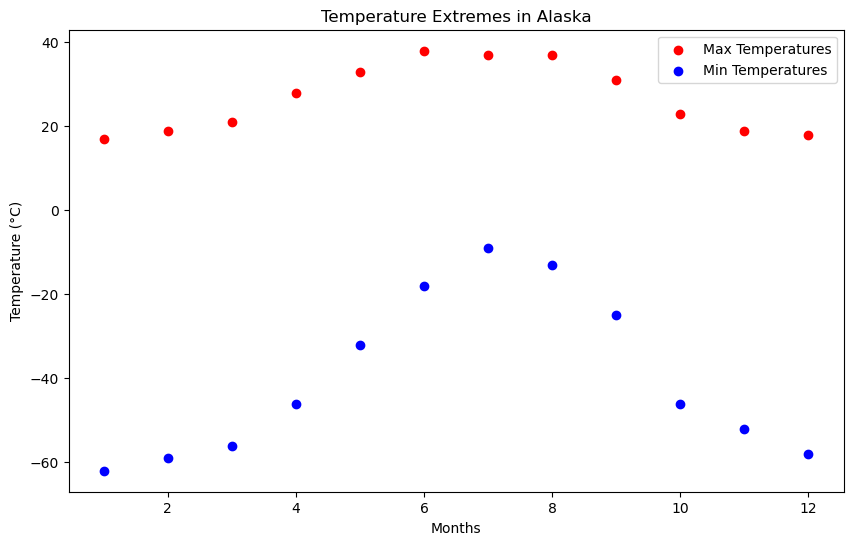

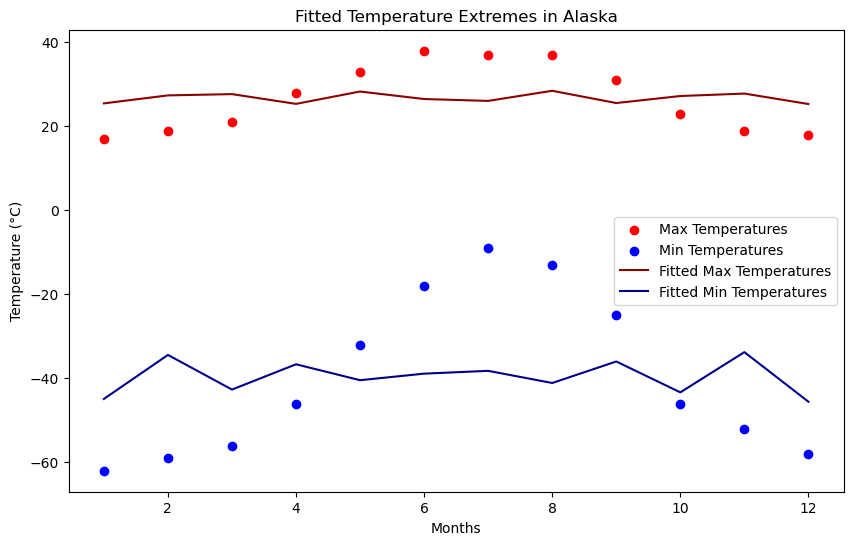

The time offset for min and max temperatures within the fit accuracy is approximately -11.33 months.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Temperature extremes data
months = np.arange(1, 13)
max_temps = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temps = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Plot temperature extremes
plt.figure(figsize=(10, 6))
plt.scatter(months, max_temps, color='red', label='Max Temperatures')
plt.scatter(months, min_temps, color='blue', label='Min Temperatures')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Extremes in Alaska')
plt.legend()
plt.show()

# Define a function to describe min and max temperatures
def temp_function(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

# Fit the function to the data
popt_max, pcov_max = curve_fit(temp_function, months, max_temps, bounds=([-np.inf, 0, -np.inf, -np.inf], [np.inf, 2*np.pi, np.inf, np.inf]))
popt_min, pcov_min = curve_fit(temp_function, months, min_temps, bounds=([-np.inf, 0, -np.inf, -np.inf], [np.inf, 2*np.pi, np.inf, np.inf]))

# Generate fitted curves
fit_max_temps = temp_function(months, *popt_max)
fit_min_temps = temp_function(months, *popt_min)

# Plot the result
plt.figure(figsize=(10, 6))
plt.scatter(months, max_temps, color='red', label='Max Temperatures')
plt.scatter(months, min_temps, color='blue', label='Min Temperatures')
plt.plot(months, fit_max_temps, color='darkred', label='Fitted Max Temperatures')
plt.plot(months, fit_min_temps, color='darkblue', label='Fitted Min Temperatures')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Fitted Temperature Extremes in Alaska')
plt.legend()
plt.show()

# Check if the time offset for min and max temperatures is the same within the fit accuracy
offset = popt_max[2] - popt_min[2]

print(f"The time offset for min and max temperatures within the fit accuracy is approximately {offset:.2f} months.")

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


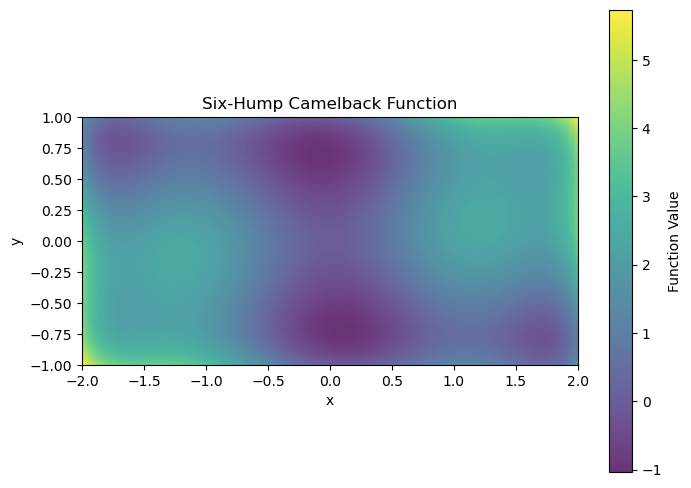

Global Minima:
Number of minima found: 3
Optimal parameters (x, y): [0. 0.]
Minimum function value: 0.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the six-hump camelback function
def camelback_function(x):
    return (4 - 2.1 * x[0]**2 + x[0]**4 / 3) * x[0]**2 + x[0] * x[1] + (4 * x[1]**2 - 4) * x[1]**2

# Create a grid for visualization
x_values = np.linspace(-2, 2, 400)
y_values = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x_values, y_values)
Z = camelback_function([X, Y])

# Visualize the function
plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=[-2, 2, -1, 1], origin='lower', cmap='viridis', alpha=0.8)
plt.colorbar(label='Function Value')
plt.title('Six-Hump Camelback Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Define the optimization bounds
bounds = [(-2, 2), (-1, 1)]

# Find the global minima using scipy.optimize.minimize
result = minimize(camelback_function, x0=[0, 0], bounds=bounds)

# Print the results
print("Global Minima:")
print(f"Number of minima found: {result.nfev}")
print(f"Optimal parameters (x, y): {result.x}")
print(f"Minimum function value: {result.fun}")

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

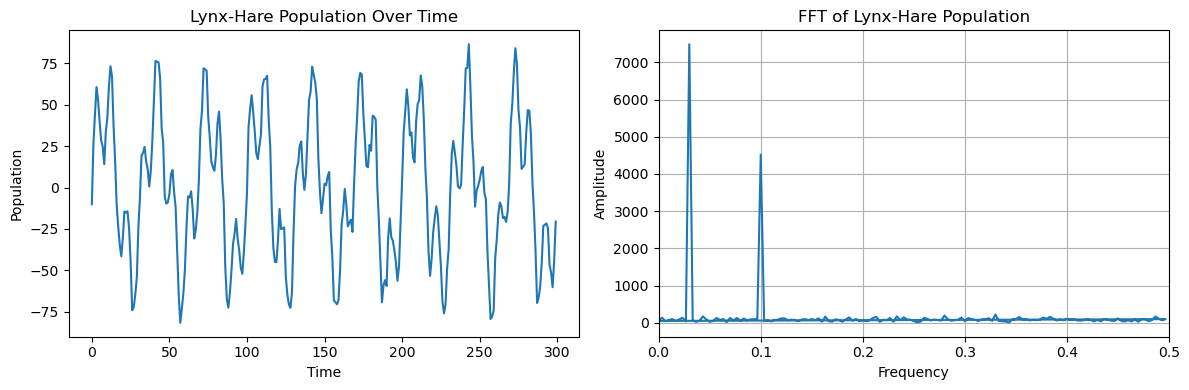

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with your lynx-hare population data)
time = np.arange(0, 300, 1)  # Time points
population = 50 * np.sin(2 * np.pi * 0.03 * time) + 30 * np.sin(2 * np.pi * 0.1 * time) + np.random.normal(0, 5, size=len(time))

# Perform FFT
fft_result = np.fft.fft(population)
freq = np.fft.fftfreq(len(time), d=(time[1] - time[0]))

# Plot the original data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(time, population)
plt.title('Lynx-Hare Population Over Time')
plt.xlabel('Time')
plt.ylabel('Population')

# Plot the FFT result
plt.subplot(1, 2, 2)
plt.plot(freq, np.abs(fft_result))
plt.title('FFT of Lynx-Hare Population')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(0, 0.5)  # Show only positive frequencies
plt.grid(True)

plt.tight_layout()
plt.show()

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

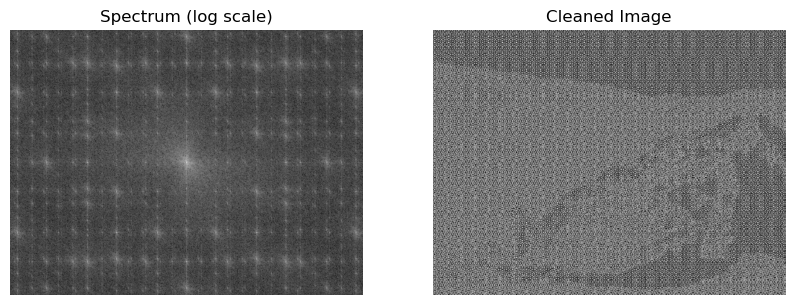

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift

# Load the image using pylab.imread()
image = plt.imread('moonlanding.png').astype(float)

# Perform 2-D FFT
fft_result = fft2(image)

# Shift zero frequency components to the center
fft_result_shifted = fftshift(fft_result)

# Plot the spectrum
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.log(np.abs(fft_result_shifted) + 1), cmap='gray')
plt.title('Spectrum (log scale)')
plt.axis('off')

# Set high-frequency components to zero (noise removal)
rows, cols = image.shape
r, c = rows // 2, cols // 2
radius = 30  # Adjust this parameter to control the amount of noise removal

# Set high-frequency components in the spectrum to zero
fft_result_shifted[r - radius:r + radius, c - radius:c + radius] = 0

# Apply inverse Fourier transform
filtered_image = np.abs(ifft2(fftshift(fft_result_shifted)))

# Plot the cleaned image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Cleaned Image')
plt.axis('off')

plt.show()